In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('heart').getOrCreate()

In [2]:
# Let's read in the data. Note that it's in the format of CSV.
df = spark.read.csv('framingham.csv',inferSchema=True, header=True)
df.printSchema()

root
 |-- male: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- currentSmoker: integer (nullable = true)
 |-- cigsPerDay: string (nullable = true)
 |-- BPMeds: string (nullable = true)
 |-- prevalentStroke: integer (nullable = true)
 |-- prevalentHyp: integer (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- totChol: string (nullable = true)
 |-- sysBP: double (nullable = true)
 |-- diaBP: double (nullable = true)
 |-- BMI: string (nullable = true)
 |-- heartRate: string (nullable = true)
 |-- glucose: string (nullable = true)
 |-- TenYearCHD: integer (nullable = true)



In [3]:
# We know that we can show a DataFrame, but that's resulted in a mess! 
df.head(5)

[Row(male=1, age=39, education='4', currentSmoker=0, cigsPerDay='0', BPMeds='0', prevalentStroke=0, prevalentHyp=0, diabetes=0, totChol='195', sysBP=106.0, diaBP=70.0, BMI='26.97', heartRate='80', glucose='77', TenYearCHD=0),
 Row(male=0, age=46, education='2', currentSmoker=0, cigsPerDay='0', BPMeds='0', prevalentStroke=0, prevalentHyp=0, diabetes=0, totChol='250', sysBP=121.0, diaBP=81.0, BMI='28.73', heartRate='95', glucose='76', TenYearCHD=0),
 Row(male=1, age=48, education='1', currentSmoker=1, cigsPerDay='20', BPMeds='0', prevalentStroke=0, prevalentHyp=0, diabetes=0, totChol='245', sysBP=127.5, diaBP=80.0, BMI='25.34', heartRate='75', glucose='70', TenYearCHD=0),
 Row(male=0, age=61, education='3', currentSmoker=1, cigsPerDay='30', BPMeds='0', prevalentStroke=0, prevalentHyp=1, diabetes=0, totChol='225', sysBP=150.0, diaBP=95.0, BMI='28.58', heartRate='65', glucose='103', TenYearCHD=1),
 Row(male=0, age=46, education='3', currentSmoker=1, cigsPerDay='23', BPMeds='0', prevalentSt

In [4]:
print((df.count(), len(df.columns)))

(4238, 16)


## Data Exploration

#### Distribution of Patient Age

In [5]:
df.agg({"age":"mean"}).show()

+-----------------+
|         avg(age)|
+-----------------+
|49.58494572911751|
+-----------------+



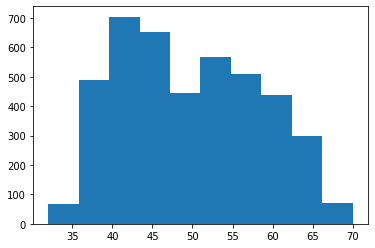

In [6]:
# Import the relevant Python libraries.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Interact with Spark using SQL, you can also filter the data you see. 
# For example, age has some null values. We can remove all null values before visualising the data.
ageArr = np.array(df.filter('Age > 0').select('Age').collect())
plt.hist(ageArr)
plt.show()

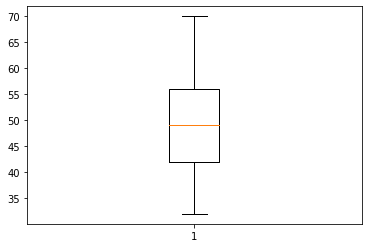

In [7]:
plt.boxplot(ageArr)
plt.show()

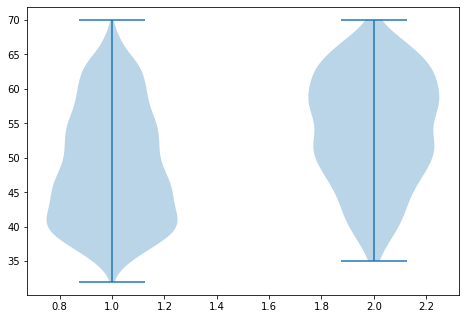

In [8]:
df.createOrReplaceTempView('heart')


age0 = spark.sql("SELECT age FROM heart WHERE TenYearCHD = 0")
age0Arr = np.array(age0.collect())
age1 = spark.sql("SELECT age FROM heart WHERE TenYearCHD = 1")
age1Arr = np.array(age1.collect())

## combine these different collections into a list
data_to_plot = [age0Arr.flatten(), age1Arr.flatten()]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()

#### Distribution of sysBP

In [9]:
df.agg({"sysBP":"mean"}).show()

+------------------+
|        avg(sysBP)|
+------------------+
|132.35240679565834|
+------------------+



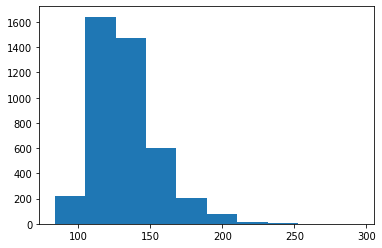

In [10]:
sysArr = np.array(df.filter('sysBP > 0').select('sysBP').collect())
plt.hist(sysArr)
plt.show()

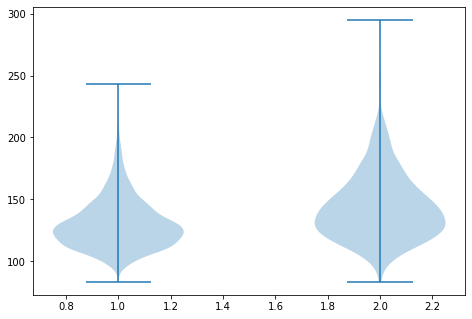

In [11]:
df.createOrReplaceTempView('heart')


sysBP0 = spark.sql("SELECT sysBP FROM heart WHERE TenYearCHD = 0")
sysArr0 = np.array(sysBP0.collect())
sysBP1 = spark.sql("SELECT sysBP FROM heart WHERE TenYearCHD = 1")
sysArr1 = np.array(sysBP1.collect())

## combine these different collections into a list
data_to_plot = [sysArr0.flatten(), sysArr1.flatten()]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()

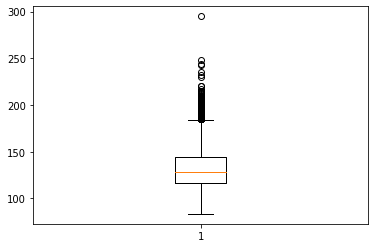

In [12]:
plt.boxplot(sysArr)
plt.show()

### Distribution of diaBP


In [13]:
df.agg({"diaBP":"mean"}).show()

+-----------------+
|       avg(diaBP)|
+-----------------+
|82.89346389806512|
+-----------------+



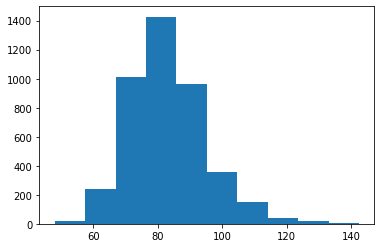

In [14]:
diaBP = np.array(df.filter('diaBP > 0').select('diaBP').collect())
plt.hist(diaBP)
plt.show()

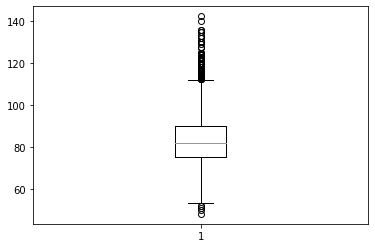

In [15]:
plt.boxplot(diaBP)
plt.show()

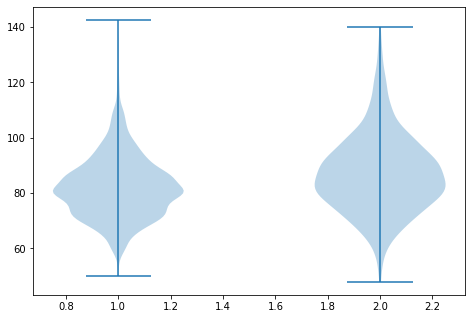

In [16]:
df.createOrReplaceTempView('heart')


diaBP0 = spark.sql("SELECT diaBP FROM heart WHERE TenYearCHD = 0")
diaArr0 = np.array(diaBP0.collect())
diaBP1 = spark.sql("SELECT diaBP FROM heart WHERE TenYearCHD = 1")
diaArr1 = np.array(diaBP1.collect())

## combine these different collections into a list
data_to_plot = [diaArr0.flatten(), diaArr1.flatten()]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()

### Gender

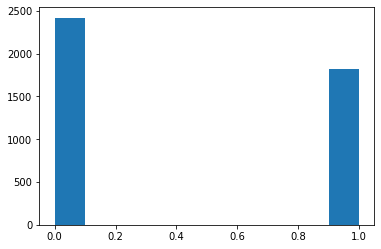

In [17]:
gender = np.array(df.select('male').collect())
plt.hist(gender)
plt.show()

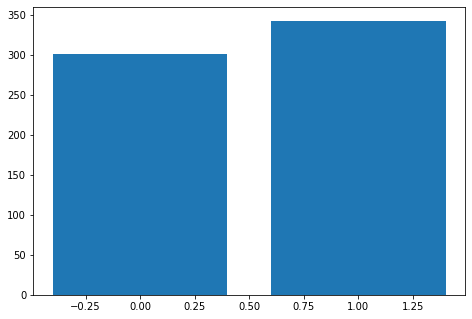

In [18]:
df.createOrReplaceTempView('heart')


maleCHD = spark.sql("SELECT male FROM heart WHERE TenYearCHD = 1 AND male = 0")
maleArr0 = np.array(maleCHD.collect())
maleCHD1 = spark.sql("SELECT male FROM heart WHERE TenYearCHD = 1 AND male = 1")
maleArr1 = np.array(maleCHD1.collect())

## combine these different collections into a list
data_to_plot = [maleArr0, maleArr1]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.bar( [0, 1], [len(list(np.reshape(maleArr0, np.product(maleArr0.shape)))),len(list(np.reshape(maleArr1, np.product(maleArr1.shape))))])
plt.show()

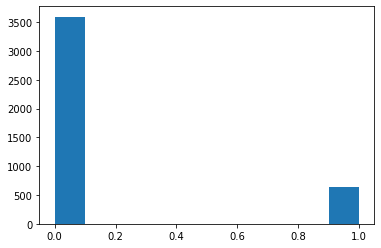

In [19]:
target = np.array(df.select('TenYearCHD').collect())
plt.hist(target)
plt.show()

In [20]:
import seaborn as sns

### More Aggregation

In [21]:
df.groupBy('TenYearCHD').mean().show()

+----------+-------------------+-----------------+-------------------+--------------------+-------------------+--------------------+------------------+-----------------+---------------+
|TenYearCHD|          avg(male)|         avg(age)| avg(currentSmoker)|avg(prevalentStroke)|  avg(prevalentHyp)|       avg(diabetes)|        avg(sysBP)|       avg(diaBP)|avg(TenYearCHD)|
+----------+-------------------+-----------------+-------------------+--------------------+-------------------+--------------------+------------------+-----------------+---------------+
|         1|  0.532608695652174|54.14596273291925| 0.5170807453416149|0.017080745341614908| 0.5046583850931677|0.062111801242236024| 143.6187888198758|86.98136645962732|            1.0|
|         0|0.41068447412353926|48.76766833611575|0.48998330550918195|0.003895381190873...|0.27573734001112965|0.019198664440734557|130.33361157484697|82.16096271563717|            0.0|
+----------+-------------------+-----------------+-------------------+

In [22]:
df.groupBy('male').mean().select(['male','avg(age)']).show()

+----+------------------+
|male|          avg(age)|
+----+------------------+
|   1|49.298515667949424|
|   0| 49.80033071517156|
+----+------------------+



In [23]:
df.groupBy('TenYearCHD').min().select(['TenYearCHD','min(age)']).show()

+----------+--------+
|TenYearCHD|min(age)|
+----------+--------+
|         1|      35|
|         0|      32|
+----------+--------+



### Checking the missing values

In [24]:
import numpy as np
# import statsmodels.api as sm

In [25]:
import pandas as pd

In [26]:
df.na.drop().show()

+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+-----+---------+-------+----------+
|male|age|education|currentSmoker|cigsPerDay|BPMeds|prevalentStroke|prevalentHyp|diabetes|totChol|sysBP|diaBP|  BMI|heartRate|glucose|TenYearCHD|
+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+-----+---------+-------+----------+
|   1| 39|        4|            0|         0|     0|              0|           0|       0|    195|106.0| 70.0|26.97|       80|     77|         0|
|   0| 46|        2|            0|         0|     0|              0|           0|       0|    250|121.0| 81.0|28.73|       95|     76|         0|
|   1| 48|        1|            1|        20|     0|              0|           0|       0|    245|127.5| 80.0|25.34|       75|     70|         0|
|   0| 61|        3|            1|        30|     0|              0|           1|       0|    225|150.0| 95.0|28.58|       6

In [27]:
def anyNull(df):
    df.createOrReplaceTempView('heart')
    for col in df.columns:
        spark.sql("SELECT * FROM heart WHERE "+col+"= 'NA'").show()
        

In [28]:
anyNull(df)

+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+---+---------+-------+----------+
|male|age|education|currentSmoker|cigsPerDay|BPMeds|prevalentStroke|prevalentHyp|diabetes|totChol|sysBP|diaBP|BMI|heartRate|glucose|TenYearCHD|
+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+---+---------+-------+----------+
+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+---+---------+-------+----------+

+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+---+---------+-------+----------+
|male|age|education|currentSmoker|cigsPerDay|BPMeds|prevalentStroke|prevalentHyp|diabetes|totChol|sysBP|diaBP|BMI|heartRate|glucose|TenYearCHD|
+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+---+---------+-------+---

In [29]:
df.toPandas().isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [30]:
print((df.count(), len(df.columns)))

(4238, 16)


In [31]:
df.printSchema()

root
 |-- male: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- currentSmoker: integer (nullable = true)
 |-- cigsPerDay: string (nullable = true)
 |-- BPMeds: string (nullable = true)
 |-- prevalentStroke: integer (nullable = true)
 |-- prevalentHyp: integer (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- totChol: string (nullable = true)
 |-- sysBP: double (nullable = true)
 |-- diaBP: double (nullable = true)
 |-- BMI: string (nullable = true)
 |-- heartRate: string (nullable = true)
 |-- glucose: string (nullable = true)
 |-- TenYearCHD: integer (nullable = true)



### Formated data

In [32]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)

from pyspark.ml import Pipeline

In [33]:
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column 
            in list(['education','cigsPerDay','BPMeds','totChol','sysBP','diaBP','BMI','heartRate','glucose']) ]

pipeline = Pipeline(stages=indexers)
df_r = pipeline.fit(df).transform(df)

In [34]:
 df_r.printSchema()

root
 |-- male: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- currentSmoker: integer (nullable = true)
 |-- cigsPerDay: string (nullable = true)
 |-- BPMeds: string (nullable = true)
 |-- prevalentStroke: integer (nullable = true)
 |-- prevalentHyp: integer (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- totChol: string (nullable = true)
 |-- sysBP: double (nullable = true)
 |-- diaBP: double (nullable = true)
 |-- BMI: string (nullable = true)
 |-- heartRate: string (nullable = true)
 |-- glucose: string (nullable = true)
 |-- TenYearCHD: integer (nullable = true)
 |-- education_index: double (nullable = true)
 |-- cigsPerDay_index: double (nullable = true)
 |-- BPMeds_index: double (nullable = true)
 |-- totChol_index: double (nullable = true)
 |-- sysBP_index: double (nullable = true)
 |-- diaBP_index: double (nullable = true)
 |-- BMI_index: double (nullable = true)
 |-- heartRate_index: double (nullable 

In [35]:
print((df.count(), len(df.columns)))

(4238, 16)


### Handling Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb6379dbcc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb6379dbb00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb6379822e8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb650978470>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6377e6d30>],
 'means': []}

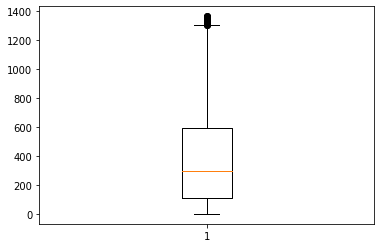

In [36]:
plt.boxplot(df_r.toPandas().BMI_index)

In [37]:
dfPy = df_r.toPandas()

In [38]:
dfPy = dfPy.loc[dfPy.BMI_index <= 40]
dfPy = dfPy.loc[dfPy.BMI_index >= 15]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb6374c5d68>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb6374c5fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb6374c5908>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb6374c26a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6374c2668>],
 'means': []}

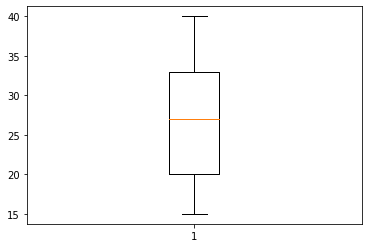

In [39]:
plt.boxplot(dfPy.BMI_index)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb6378db5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb6378dbd68>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb637890c18>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb6378db2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6378b7c50>],
 'means': []}

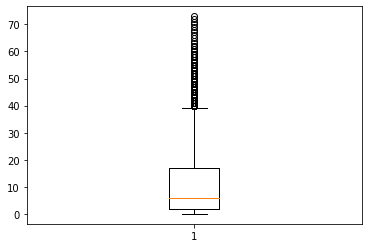

In [40]:
plt.boxplot(df_r.toPandas().heartRate_index)

In [41]:
dfPy = dfPy.loc[dfPy.heartRate_index <= 200]
dfPy = dfPy.loc[dfPy.heartRate_index >= 50]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb637513f60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb637513630>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb637739f60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb637513828>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6375d9860>],
 'means': []}

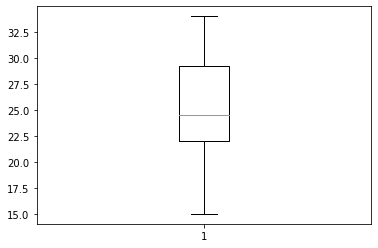

In [42]:
plt.boxplot(dfPy.BMI_index)

### Renaming the column name -- Bad Metadata

In [43]:
df_r1=df_r.withColumnRenamed('male','Sex_male')

In [44]:
# df_pandas = df_spark.toPandas()

### Data Construct

### Reduce Data

In [45]:
# plt.figure(figsize=(6, 4))
# sns.countplot('TenYearCHD', data=df_pandas)
# plt.title('Class Distributions')

In [46]:
# df_pandas.shape


In [47]:
 df_r1.printSchema()

root
 |-- Sex_male: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- currentSmoker: integer (nullable = true)
 |-- cigsPerDay: string (nullable = true)
 |-- BPMeds: string (nullable = true)
 |-- prevalentStroke: integer (nullable = true)
 |-- prevalentHyp: integer (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- totChol: string (nullable = true)
 |-- sysBP: double (nullable = true)
 |-- diaBP: double (nullable = true)
 |-- BMI: string (nullable = true)
 |-- heartRate: string (nullable = true)
 |-- glucose: string (nullable = true)
 |-- TenYearCHD: integer (nullable = true)
 |-- education_index: double (nullable = true)
 |-- cigsPerDay_index: double (nullable = true)
 |-- BPMeds_index: double (nullable = true)
 |-- totChol_index: double (nullable = true)
 |-- sysBP_index: double (nullable = true)
 |-- diaBP_index: double (nullable = true)
 |-- BMI_index: double (nullable = true)
 |-- heartRate_index: double (nulla

In [48]:
columns_to_drop = ['education', 'cigsPerDay','BPMeds','totChol','sysBP_index','diaBP_index','BMI','heartRate','glucose']
df_d = df_r1.drop(*columns_to_drop)

In [49]:
 df_d.printSchema()

root
 |-- Sex_male: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- currentSmoker: integer (nullable = true)
 |-- prevalentStroke: integer (nullable = true)
 |-- prevalentHyp: integer (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- sysBP: double (nullable = true)
 |-- diaBP: double (nullable = true)
 |-- TenYearCHD: integer (nullable = true)
 |-- education_index: double (nullable = true)
 |-- cigsPerDay_index: double (nullable = true)
 |-- BPMeds_index: double (nullable = true)
 |-- totChol_index: double (nullable = true)
 |-- BMI_index: double (nullable = true)
 |-- heartRate_index: double (nullable = true)
 |-- glucose_index: double (nullable = true)



In [50]:
inputCols = list(set(df_d.columns)-set(['TenYearCHD']))
print(inputCols)
assembler = VectorAssembler(inputCols=inputCols,outputCol='features')

['prevalentStroke', 'diabetes', 'totChol_index', 'diaBP', 'BPMeds_index', 'cigsPerDay_index', 'BMI_index', 'prevalentHyp', 'education_index', 'Sex_male', 'currentSmoker', 'age', 'heartRate_index', 'sysBP', 'glucose_index']


In [51]:
from pyspark.ml.classification import RandomForestClassifier
from numpy import allclose
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StringIndexer

td = assembler.transform(df_d)
from pyspark.ml.feature import ChiSqSelector
selector = ChiSqSelector(numTopFeatures=11, featuresCol="features",
                         outputCol="selectedFeatures", labelCol="TenYearCHD")

result = selector.fit(td).transform(td)

print("ChiSqSelector output with top %d features selected" % selector.getNumTopFeatures())

selector.fit(td).selectedFeatures

ChiSqSelector output with top 11 features selected


[7, 11, 13, 3, 1, 14, 9, 4, 8, 0, 2]

#### 'glucose_index','BPMeds_index','age','education_index','diabetes',
#### 'prevalentHyp','diaBP','Sex_male','totChol_index','currentSmoker','cigsPerDay_index'

In [52]:
df_s = df_d.drop('BMI_index','currentSmoker','heartRate_index','cigsPerDay_index')

In [53]:
print((df_s.count(), len(df_s.columns)))

(4238, 12)


### Rebalancing Data

/home/ubuntu/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions')

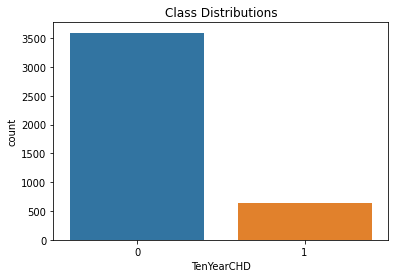

In [54]:
plt.figure(figsize=(6, 4))
sns.countplot('TenYearCHD', data=df_s.toPandas())
plt.title('Class Distributions')

In [55]:
df_a = df_s.filter(df_s['TenYearCHD'] == 0)
df_b = df_s.filter(df_s['TenYearCHD'] == 1)

a_count = df_a.count()
b_count = df_b.count() 
ratio = a_count / b_count

df_b_oversampled = df_b.sample(withReplacement=True, fraction=ratio, seed=1)
df_sample = df_a.unionAll(df_b_oversampled)

/home/ubuntu/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions')

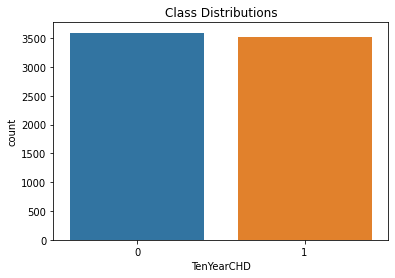

In [56]:
plt.figure(figsize=(6, 4))
sns.countplot('TenYearCHD', data=df_sample.toPandas())
plt.title('Class Distributions')

In [57]:
print((df_sample.count(), len(df_sample.columns)))

(7120, 12)


## Data Mining

### Split Data

In [58]:
inputCols = list(set(df_sample.columns)-set(['TenYearCHD']))
assembler2 = VectorAssembler(inputCols=inputCols,outputCol='features')

In [59]:
# Train/test split. 
train_data, test_data = df_sample.randomSplit([0.7,.3],17)

### Logistic Regression (model1)

In [60]:
from pyspark.ml.classification import LogisticRegression

In [61]:
log_reg_heart = LogisticRegression(featuresCol='features',labelCol='TenYearCHD')
pipeline = Pipeline(stages=[assembler2,log_reg_heart])
fit_model1 = pipeline.fit(train_data)
results1 = fit_model1.transform(test_data)

In [62]:
[stage.coefficients for stage in fit_model1.stages if hasattr(stage, "coefficients")]

[DenseVector([0.5496, 0.6494, -0.0568, 0.5307, 0.0577, 0.001, -0.0071, 0.1858, 0.0146, 0.3179, 0.0038])]

In [63]:
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator
# #Importance Graph
# x_columns = np.array(['age', 'sysBP','prevalenHyp','diaBP','diabets','glucose_index','Sex_male','BPMeds_index','education_index','prevalentStroke','totchole_index'])
# plt.figure(figsize=(10,6))
# plt.title("Coefficients",fontsize = 18)
# plt.ylabel("Coefficients level",fontsize = 14)
# plt.rcParams['axes.unicode_minus'] = False
# plt.ylim(0, 1)
# y_major_locator=MultipleLocator(0.1)
# ax=plt.gca()
# ax.yaxis.set_major_locator(y_major_locator)

# #Get every coefficient
# coefficients =[stage.coefficients for stage in fit_model1.stages if hasattr(stage, "coefficients")]
# for i in range(x_columns.shape[0]):
#     plt.bar(i,coefficients[indices[i]],color='orange',align='center')
#     plt.xticks(np.arange(x_columns.shape[0]),x_columns,fontsize=14)
# plt.show()

In [64]:
data_coefficients = {'Columns':['age', 'sysBP','prevalenHyp','diaBP','diabets','glucose_index','Sex_male','BPMeds_index','education_index','prevalentStroke','totchole_index'],
        'coefficients': [0.0577, -0.0071, 0.5307, 0.0038, 0.6494, 0.3179, 0.0146, 0.1858, -0.0568, 0.001, 0.5496]}

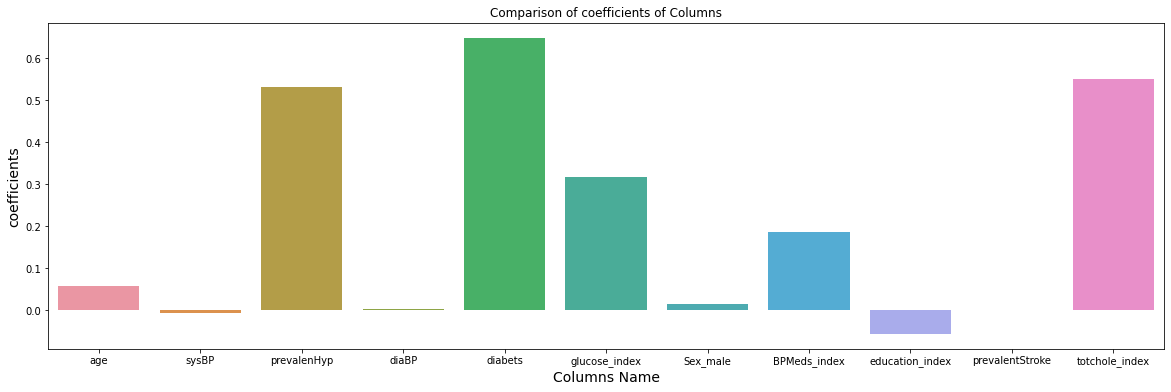

In [65]:
plt.figure(figsize=(20,6))
sns.barplot(x='Columns', y='coefficients', data = data_coefficients)
plt.title('Comparison of coefficients of Columns')
plt.xlabel('Columns Name', fontsize=14)
plt.ylabel('coefficients', fontsize=14)
plt.show()

In [66]:
coeff = spark.createDataFrame([("age", 0.0577),
                              ("sysBP", -0.0071),
                              ("prevalenHyp", 0.5307),
                              ("diaBP", 0.0038),
                              ("diabets", 0.6494),
                              ("glucose_index",0.3179),
                              ("Sex_male", 0.0146),
                              ("BPMeds_index", 0.1858),
                              ("education_index", -0.0568),
                              ("prevalentStroke", 0.001),
                              ("totchole_index", 0.5496)],
                             ["Columns Name", "coefficients"])
coeff.show()

+---------------+------------+
|   Columns Name|coefficients|
+---------------+------------+
|            age|      0.0577|
|          sysBP|     -0.0071|
|    prevalenHyp|      0.5307|
|          diaBP|      0.0038|
|        diabets|      0.6494|
|  glucose_index|      0.3179|
|       Sex_male|      0.0146|
|   BPMeds_index|      0.1858|
|education_index|     -0.0568|
|prevalentStroke|       0.001|
| totchole_index|      0.5496|
+---------------+------------+



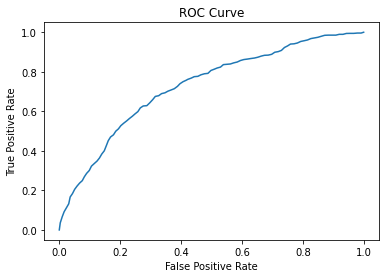

Area Under the Curve: 0.726356105584827


In [67]:
import matplotlib.pyplot as plt
import numpy as np
# Let's get a summary of the data.
training_summary = fit_model1.stages[-1].summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

In [68]:
# Evaluate the model using the binary classifer.
from pyspark.ml.evaluation import BinaryClassificationEvaluator

my_eval1 = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='TenYearCHD')

In [69]:
# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
results1.select('TenYearCHD','prediction').show()

+----------+----------+
|TenYearCHD|prediction|
+----------+----------+
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
+----------+----------+
only showing top 20 rows



In [70]:

# We can then evaluate using AUC (area under the curve). AUC is linked to ROC.
AUC = my_eval1.evaluate(results1)

AUC

0.6679652660624844

In [71]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Select (prediction, true label) and compute test error. 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="TenYearCHD", predictionCol="prediction", metricName="accuracy")
acc = acc_evaluator.evaluate(results1)
print('Accuracy: {0:2.2f}%'.format(acc*100))

Accuracy: 66.81%


In [72]:
totalResults = results1.select('TenYearCHD','prediction')

correctResults = totalResults.filter(totalResults['TenYearCHD'] == totalResults['prediction'])

countTR = totalResults.count()
print("Correct: " + str(countTR))

countTC = correctResults.count()
print("Total Correct: " + str(countTC))

Correct: 2142
Total Correct: 1431


### RandomForestClassifier (model2)

In [73]:
from pyspark.ml.classification import RandomForestClassifier

In [74]:
RF_heart = RandomForestClassifier(featuresCol='features',labelCol='TenYearCHD',maxBins=250)
pipeline = Pipeline(stages=[assembler2,RF_heart])
fit_model = pipeline.fit(train_data)
results3 = fit_model.transform(test_data)

In [75]:
results3.select('TenYearCHD','prediction').show()

+----------+----------+
|TenYearCHD|prediction|
+----------+----------+
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
+----------+----------+
only showing top 20 rows



In [76]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Select (prediction, true label) and compute test error. 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="TenYearCHD", predictionCol="prediction", metricName="accuracy")
acc = acc_evaluator.evaluate(results3)
print('Accuracy: {0:2.2f}%'.format(acc*100))

Accuracy: 79.13%


### NaiveBayes (Model3)

In [77]:
from pyspark.ml.classification import NaiveBayes

In [78]:
nb = NaiveBayes(smoothing=1.0, modelType="multinomial",labelCol='TenYearCHD',featuresCol='features')

In [79]:
pipeline = Pipeline(stages=[assembler2,nb])
fit_model1 = pipeline.fit(train_data)
results2 = fit_model1.transform(test_data)

In [80]:
results2.select('TenYearCHD','prediction').show()

+----------+----------+
|TenYearCHD|prediction|
+----------+----------+
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       1.0|
|         0|       1.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       1.0|
|         0|       1.0|
|         0|       1.0|
|         0|       0.0|
|         0|       1.0|
|         0|       0.0|
|         0|       1.0|
|         0|       0.0|
|         0|       0.0|
|         0|       1.0|
|         0|       0.0|
+----------+----------+
only showing top 20 rows



In [81]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Select (prediction, true label) and compute test error. 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="TenYearCHD", predictionCol="prediction", metricName="accuracy")
acc = acc_evaluator.evaluate(results2)
print('Accuracy: {0:2.2f}%'.format(acc*100))

Accuracy: 53.27%


In [82]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

### Decision Tree (Model 4)

In [83]:
from pyspark.ml.classification import DecisionTreeClassifier

In [84]:
DT_heart = DecisionTreeClassifier(featuresCol='features',labelCol='TenYearCHD',maxBins=250)
pipeline = Pipeline(stages=[assembler2,DT_heart])
fit_model = pipeline.fit(train_data)
results4 = fit_model.transform(test_data)

In [85]:
results4.select('TenYearCHD','prediction').show()

+----------+----------+
|TenYearCHD|prediction|
+----------+----------+
|         0|       0.0|
|         0|       1.0|
|         0|       1.0|
|         0|       0.0|
|         0|       1.0|
|         0|       0.0|
|         0|       0.0|
|         0|       1.0|
|         0|       1.0|
|         0|       1.0|
|         0|       1.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       1.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
+----------+----------+
only showing top 20 rows



In [86]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Select (prediction, true label) and compute test error. 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="TenYearCHD", predictionCol="prediction", metricName="accuracy")
acc = acc_evaluator.evaluate(results4)
print('Accuracy: {0:2.2f}%'.format(acc*100))

Accuracy: 72.27%


### GBT  (Model 5)

In [87]:
from pyspark.ml.classification import GBTClassifier

In [88]:
GBT_heart = GBTClassifier(featuresCol='features',labelCol='TenYearCHD',maxBins=250)
pipeline = Pipeline(stages=[assembler2,GBT_heart])
fit_model = pipeline.fit(train_data)
results5 = fit_model.transform(test_data)

In [89]:
results4.select('TenYearCHD','prediction').show()

+----------+----------+
|TenYearCHD|prediction|
+----------+----------+
|         0|       0.0|
|         0|       1.0|
|         0|       1.0|
|         0|       0.0|
|         0|       1.0|
|         0|       0.0|
|         0|       0.0|
|         0|       1.0|
|         0|       1.0|
|         0|       1.0|
|         0|       1.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       1.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
+----------+----------+
only showing top 20 rows



In [90]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Select (prediction, true label) and compute test error. 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="TenYearCHD", predictionCol="prediction", metricName="accuracy")
acc = acc_evaluator.evaluate(results5)
print('Accuracy: {0:2.2f}%'.format(acc*100))

Accuracy: 82.73%


## Parameter Tuning

In [91]:
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

In [92]:
paramGrid = ParamGridBuilder() \
    .addGrid(log_reg_heart.regParam, [0.1, 0.01]) \
    .addGrid(log_reg_heart.maxIter, [10, 100, 1000]) \
    .build()

In [93]:
from sklearn.model_selection import RandomizedSearchCV 
criterion = ['gini', 'entropy']
class_weight = ['balanced', None]  
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'criterion': criterion,
              'class_weight': class_weight}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'class_weight': ['balanced', None]}


In [94]:
# from sklearn.ensemble import RandomForestClassifier
# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions-test_labels)
#     mape = 100 * np.mean(errors/test_labels)
#     accuracy = 100 - mape
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
#     return accuracy

# ## Use the random grid to search for best hyperparameters
# ## First create the base model to tune
# rf = RandomForestClassifier()
# ## Random search of parameters, using 5 fold cross validation,
# ## search across 100 different combinations, and use all available cores
# from sklearn.metrics import balanced_accuracy_score, make_scorer
# accuracy_scorer = make_scorer(balanced_accuracy_score)
# rf_random = RandomizedSearchCV(scoring=accuracy_scorer, estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=1, random_state=42, n_jobs = -1)
# ## Fit the random search model
# pddf_final = df_sample.toPandas()
# from sklearn.model_selection import train_test_split
# train_x, test_x, train_y, test_y = train_test_split(pddf_final.drop('TenYearCHD', axis=1)
#                                                         , pddf_final['TenYearCHD'], test_size=0.2, random_state=42)
# rf_random.fit(train_x, train_y)
# params = rf_random.best_params_

# base_accuracy = evaluate(params, test_x, test_y)
# print(base_accuracy)

In [95]:
# print(params)

## Comparing the Model

In [96]:
data = {'Model':['Logistic Regression','Random Forest','Naive Bayes','Decision Tree','GBT'],
        'Accuracies': [66.81, 77.50, 53.27, 72.27, 82.68]}

In [97]:
import seaborn as sns

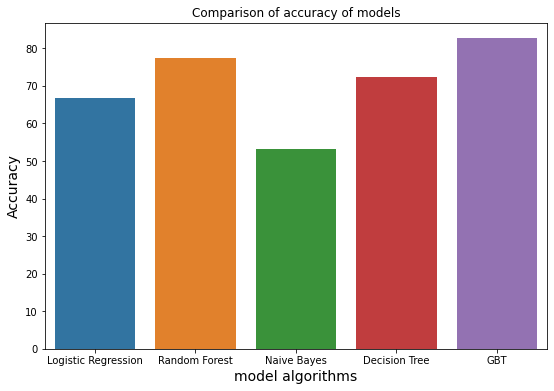

In [98]:
plt.figure(figsize=(9,6))
sns.barplot(x='Model', y='Accuracies', data = data)
plt.title('Comparison of accuracy of models')
plt.xlabel('model algorithms', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

In [99]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np


log_reg_heart = LogisticRegression(featuresCol='features',labelCol='TenYearCHD')
pipeline = Pipeline(stages=[assembler2,log_reg_heart])
fit_model1 = pipeline.fit(train_data)
results1 = fit_model1.transform(test_data)

prediction = np.array(results1.select('prediction').collect())
label = np.array(results1.select('TenYearCHD').collect())

print("Precision: " + str(precision_score(label, prediction)))
print("Recall: " + str(recall_score(label, prediction)))
print("F1 Score: " + str(f1_score(label, prediction)))

Precision: 0.6718446601941748
Recall: 0.6497652582159624
F1 Score: 0.6606205250596658


## Interpretation

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
data=df_sample.toPandas()

In [102]:
 df_sample.printSchema()

root
 |-- Sex_male: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- prevalentStroke: integer (nullable = true)
 |-- prevalentHyp: integer (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- sysBP: double (nullable = true)
 |-- diaBP: double (nullable = true)
 |-- TenYearCHD: integer (nullable = true)
 |-- education_index: double (nullable = true)
 |-- BPMeds_index: double (nullable = true)
 |-- totChol_index: double (nullable = true)
 |-- glucose_index: double (nullable = true)



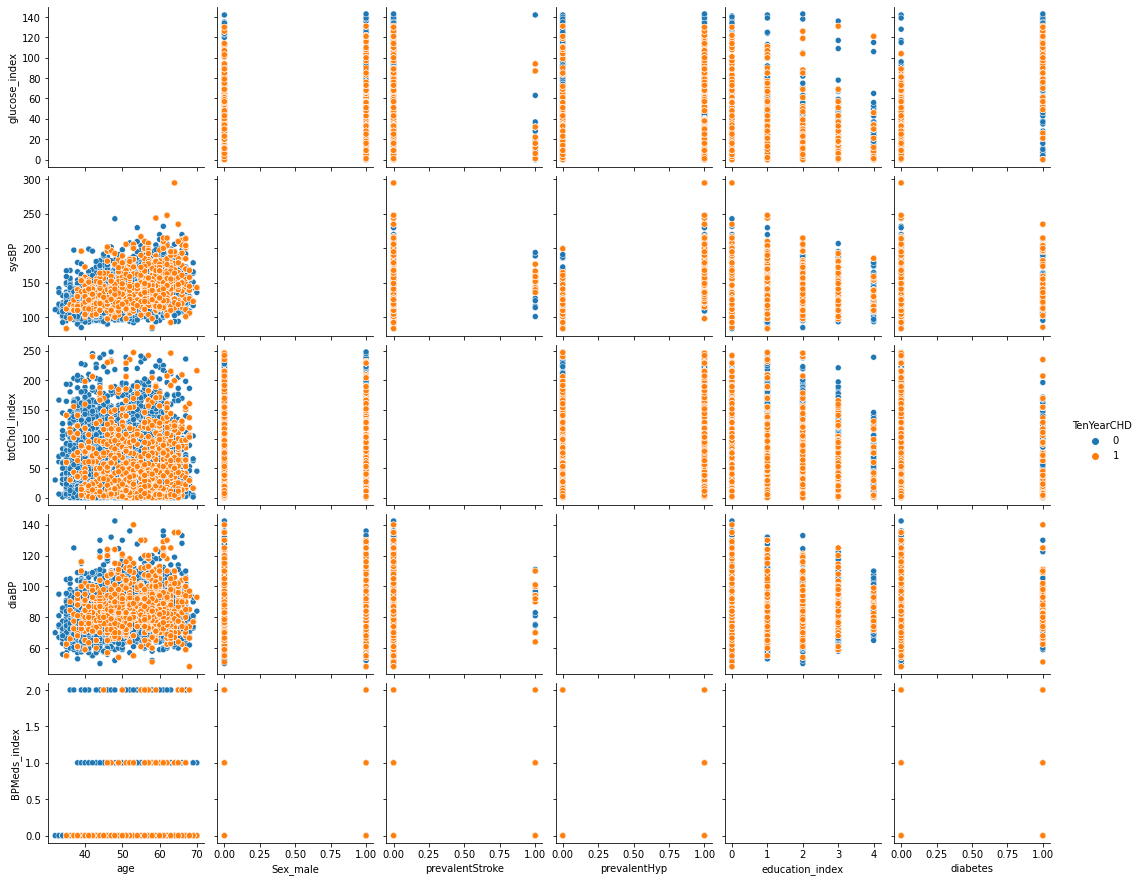

In [103]:
sns.pairplot(data,hue='TenYearCHD',x_vars = 
            ['age','Sex_male', 'prevalentStroke','prevalentHyp','education_index','diabetes'],
            y_vars = ['glucose_index','sysBP','totChol_index','diaBP','BPMeds_index'])

<AxesSubplot:>

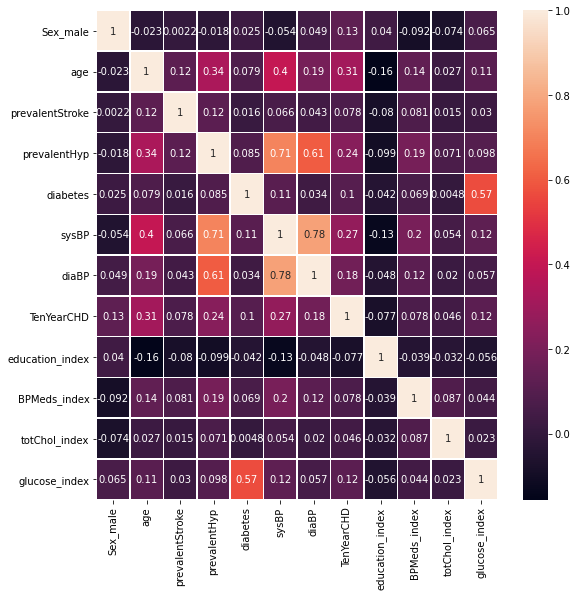

In [104]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(),linewidths=0.5, annot=True,)

<AxesSubplot:xlabel='TenYearCHD', ylabel='sysBP'>

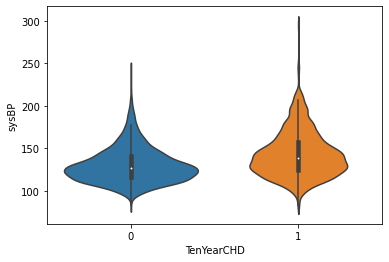

In [105]:
sns.violinplot(y='sysBP', x='TenYearCHD', data= data)

<AxesSubplot:xlabel='TenYearCHD', ylabel='age'>

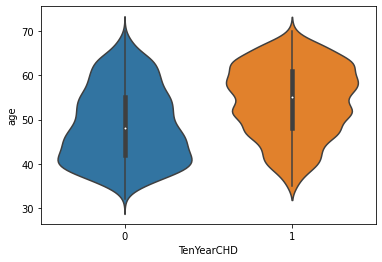

In [106]:
sns.violinplot(y='age',x='TenYearCHD', data=data)

<AxesSubplot:xlabel='TenYearCHD', ylabel='age'>

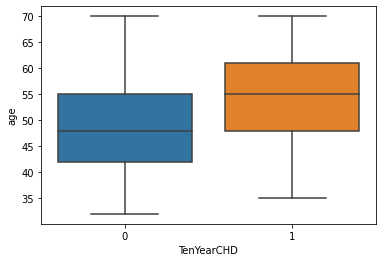

In [107]:
sns.boxplot(y='age',x='TenYearCHD',data=data)

<AxesSubplot:xlabel='TenYearCHD', ylabel='age'>

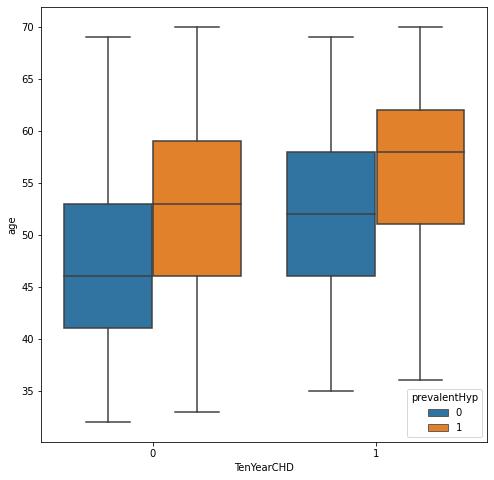

In [108]:
plt.figure(figsize=(8,8))
sns.boxplot(x='TenYearCHD', y='age', data=data, hue='prevalentHyp')

<AxesSubplot:xlabel='TenYearCHD', ylabel='age'>

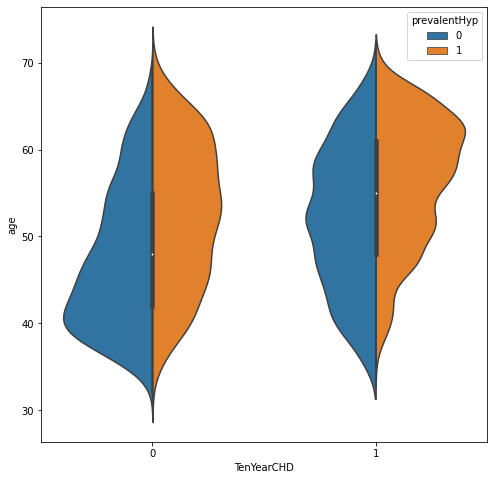

In [109]:
plt.figure(figsize=(8,8))
sns.violinplot(x='TenYearCHD', y='age', data=data, hue='prevalentHyp',split=True)

<AxesSubplot:xlabel='prevalentHyp', ylabel='sysBP'>

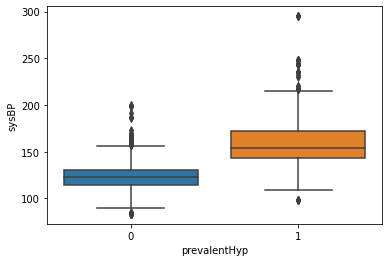

In [110]:
sns.boxplot(y='sysBP', x='prevalentHyp', data= data)

<AxesSubplot:xlabel='TenYearCHD', ylabel='diaBP'>

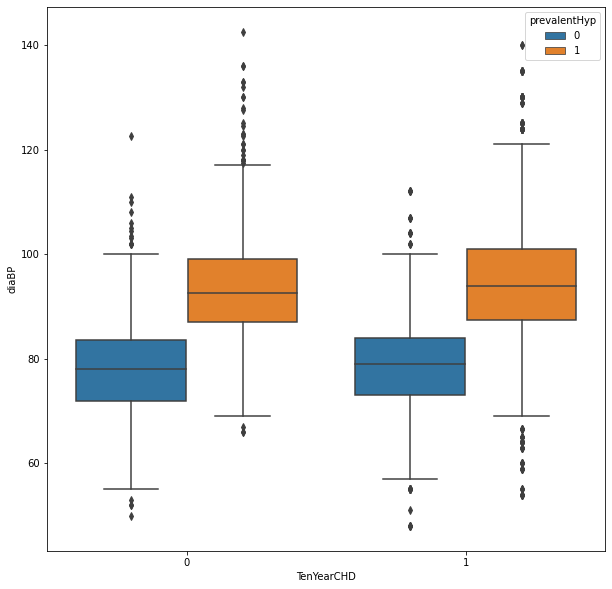

In [111]:
plt.figure(figsize=(10,10))
sns.boxplot(y='diaBP',hue='prevalentHyp', data=data,x='TenYearCHD')